In [12]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
import tensorflow as tf

In [13]:
from keras.preprocessing.image import load_img, img_to_array

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy
from scipy import misc
import cv2

In [4]:
img_width, img_height = 216, 384

In [ ]:
test_images_empty_dir = './dataset/empty_bottle/'
test_images_full_dir = './dataset/full_bottle/'

TUTAJ JEST MODEL SIECI

In [5]:
def create_model(num_classes):

    model = Sequential([
        Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
        MaxPooling2D(2, 2),

        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),

        Conv2D(64, (3, 3), activation='relu'),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),

        Conv2D(128, (3, 3), activation='relu'),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),

        Conv2D(256, (3, 3), activation='relu'),
        Conv2D(256, (3, 3), activation='relu'),
        Conv2D(256, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),

        Flatten(),
        Dense(512, activation='relu'),
        Dense(512, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

    model.summary()

    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics =['accuracy'])
    
    return model

In [35]:

def resize_dataset(label: []):
    for image_label in label:
        
        resized_images = 0
        
        directory = "processed_dataset/nowy/"+image_label
        os.mkdir(os.path.join(directory, 'resized'))
        print(image_label)
        for root, subdirs, files in os.walk(directory):
            print(resized_images)
            for image in files:
                img = cv2.imread(root+"/"+image)
                img = cv2.resize(img, (img_width, img_height))
                cv2.imwrite(directory + '/resized/' + image, img);
                resized_images = resized_images + 1
                
resize_dataset(['empty_bottle', 'full_bottle', 'almost_full', 'none'])

empty_bottle
0
600
full_bottle
0
600
600
almost_full
0
600
1200
1200
1200
none
0
1000


In [13]:
def load_datasets(label: [], images_per_class):
    
    X=[]
    y=[]
    for image_label in label:
        images_in_class = 0
        directory = "dataset/"+image_label+'/resized'
        for root, subdirs, files in os.walk(directory):
            for image in files:
                images_in_class = images_in_class + 1
                img = misc.imread(root+"/"+image)
                #img = misc.imresize(img, (img_width, img_height))
                img = img.astype('float32')
                img = img / 255.0
                X.append(img)
                y.append(label.index(image_label))
                if(images_in_class > images_per_class):
                    break
 
    X=np.array(X)
    y=np.array(y)
    return X,y

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  'processed_dataset/nowy/',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=32,
  label_mode='categorical')

validation_ds = tf.keras.utils.image_dataset_from_directory(
  'processed_dataset/nowy/',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=32,
  label_mode='categorical')

Found 2800 files belonging to 4 classes.
Using 2240 files for training.
Found 2800 files belonging to 4 classes.
Using 560 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)
num_classes = len(class_names)

['almost_full', 'empty_bottle', 'full_bottle', 'none']


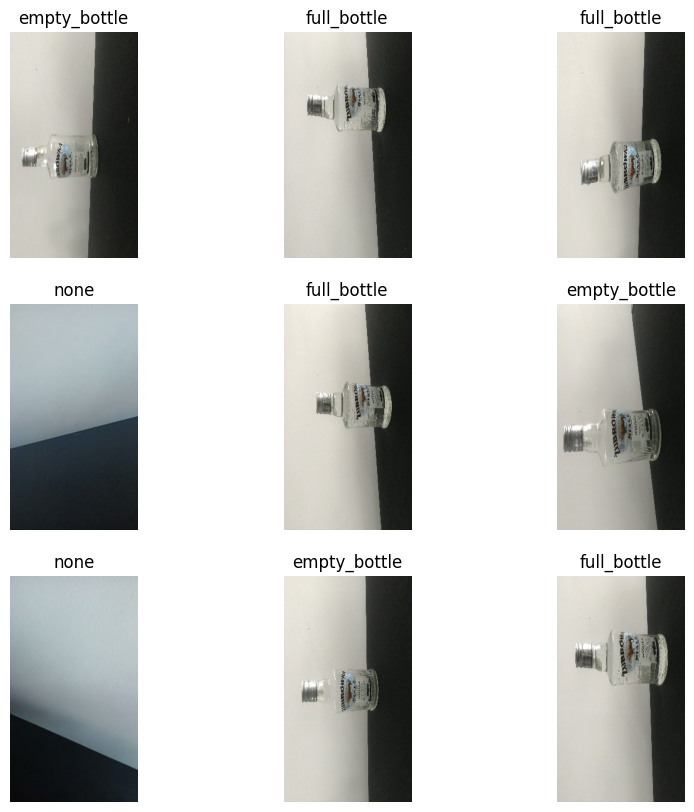

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")

plt.show()

In [20]:
X, y =load_datasets(['almost_full', 'full_bottle', 'none', 'empty_bottle'], 1000)

NameError: name 'load_datasets' is not defined

In [ ]:
y,num_classes=one_hot_encode(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

In [27]:
model = create_model(num_classes)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 382, 214, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 191, 107, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 189, 105, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 94, 52, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 92, 50, 64)        18496     
                                                                 
 conv2d_12 (Conv2D)          (None, 90, 48, 64)       

In [26]:
epochs = 20

history=model2.fit(train_ds, epochs=epochs, validation_data = validation_ds)

Epoch 1/20
200/200 [==============================] - 369s 2s/step - loss: 0.0958 - accuracy: 0.9653 - val_loss: 0.4334 - val_accuracy: 0.8406
Epoch 2/20
200/200 [==============================] - 388s 2s/step - loss: 0.0655 - accuracy: 0.9822 - val_loss: 4.9977e-04 - val_accuracy: 1.0000
Epoch 3/20
200/200 [==============================] - 391s 2s/step - loss: 0.0253 - accuracy: 0.9922 - val_loss: 0.0842 - val_accuracy: 0.9675
Epoch 4/20
 21/200 [==>...........................] - ETA: 5:17 - loss: 0.0183 - accuracy: 0.9911

KeyboardInterrupt: 

In [36]:

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

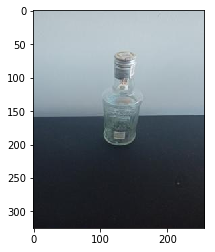

In [17]:
plt.imshow(X[0])

In [6]:
from PIL import Image

In [18]:
def make_prediction(src, model, show_image):
    for root, subdirs, files in os.walk(src):
        for images in files:
            img = Image.open(root + images)
            img = img.resize((img_width, img_height))
            if(show_image):
                img.show()
            #img = np.array(img).astype('float32')
            #img = img / 255.0
            X_to_predict = np.expand_dims(img, axis=0)
            y_pred = model.predict(X_to_predict)
            prediction_class = y_pred.argmax()
            
            print(prediction_class)
            print(class_names[prediction_class])
            print(y_pred)
            

print(class_names)

['almost_full', 'empty_bottle', 'full_bottle', 'none']


In [30]:
model.save('trening_91.h5')

In [11]:
from keras.models import load_model

# Do odczytu

In [12]:
model2 = load_model('trening_91.h5')

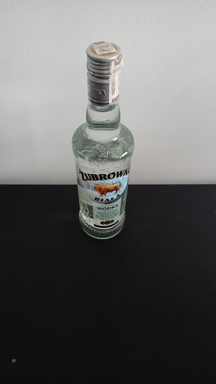

2
full_bottle
[[1.0726614e-11 1.8669431e-14 1.0000000e+00 3.1287518e-27]]


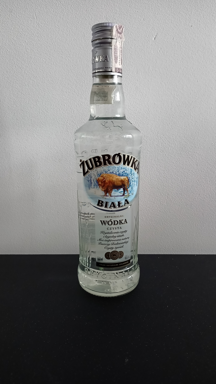

2
full_bottle
[[1.4174738e-02 6.3450904e-15 9.8582524e-01 2.4942630e-28]]


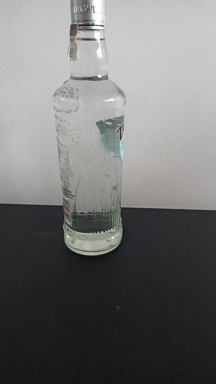

0
almost_full
[[8.5728174e-01 3.8952267e-15 1.4271823e-01 9.3458671e-24]]


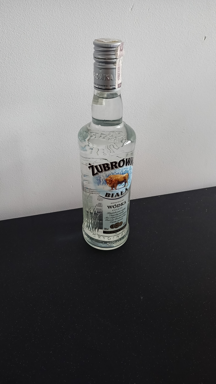

2
full_bottle
[[3.7325035e-12 6.4141895e-23 1.0000000e+00 4.2578510e-38]]


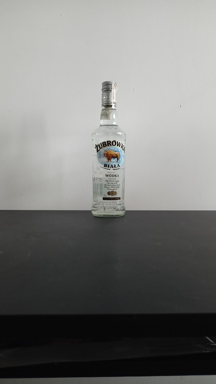

2
full_bottle
[[3.6017118e-17 1.5309047e-20 1.0000000e+00 3.0151931e-31]]


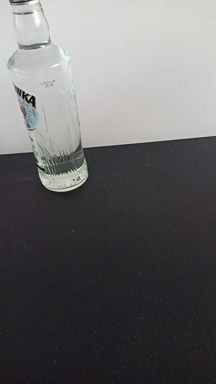

0
almost_full
[[1.0000000e+00 4.5505731e-26 9.6784694e-25 2.8404683e-21]]


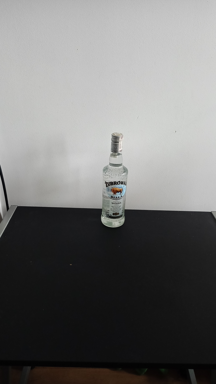

2
full_bottle
[[1.0856602e-06 1.5777996e-14 9.9999893e-01 5.5171561e-21]]


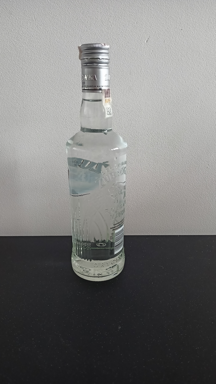

0
almost_full
[[9.9999976e-01 1.1754898e-24 2.5574303e-07 2.2674968e-36]]


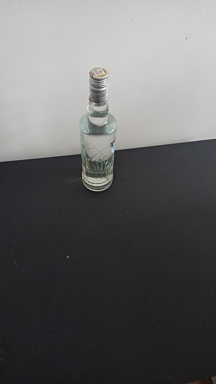

2
full_bottle
[[3.4530339e-09 9.6791530e-10 1.0000000e+00 4.2722952e-17]]


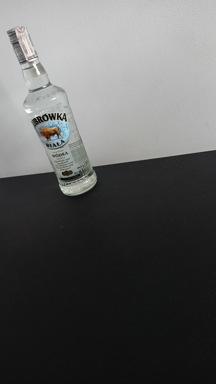

0
almost_full
[[1.0000000e+00 0.0000000e+00 1.0736800e-35 1.4181054e-33]]


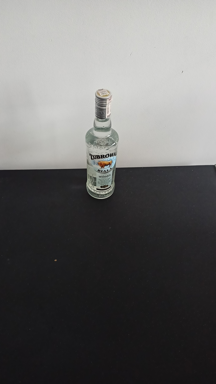

2
full_bottle
[[2.9200913e-12 3.2420834e-15 1.0000000e+00 5.1670172e-23]]


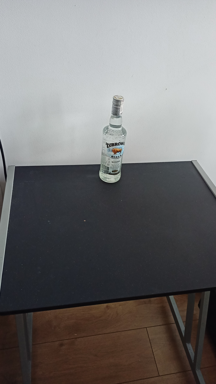

2
full_bottle
[[8.9977492e-10 3.6025600e-19 1.0000000e+00 1.5162184e-27]]


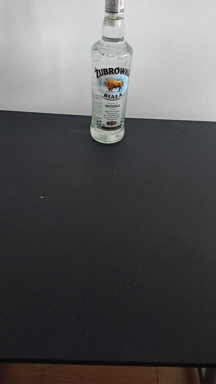

1
empty_bottle
[[3.82004456e-10 1.00000000e+00 1.11155586e-26 7.36824958e-24]]


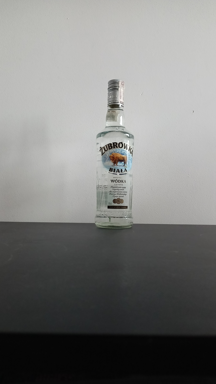

2
full_bottle
[[6.235391e-13 4.870216e-21 1.000000e+00 4.323798e-30]]


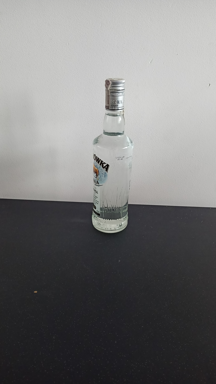

2
full_bottle
[[7.4232409e-15 2.0953422e-20 1.0000000e+00 8.7856983e-32]]


In [28]:
make_prediction('dataset/testy_butelka/Pełny/', model2, True)